In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


# Import data

In [2]:
path = 'C:/Users/84393/OneDrive - CÔNG TY TNHH OFFICIENCE/PYTHON/ML_BangaloreHomePrice/'
df = pd.read_csv(path + 'bengaluru_house_prices.csv')
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df = df.drop(['availability','society'], axis = 'columns')
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [5]:
df.groupby(['area_type'])['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Is null

In [6]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
# location has only one row null >> can remove it
df = df[~(df.location.isnull())]

In [8]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Traiter size

In [9]:
df['size'].dtype

dtype('O')

In [10]:
df['bhk'] = df['size'].apply(lambda x: int(str(x).split(' ')[0]) if str(x) != 'nan' else 0 )
df.head()

C:\Users\84393\AppData\Local\Temp\ipykernel_12408\1725849063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bhk'] = df['size'].apply(lambda x: int(str(x).split(' ')[0]) if str(x) != 'nan' else 0 )


,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


## Traiter total_sqft

In [11]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [12]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
# inconsent data format in total_sqft
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df[~df['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,Devanahalli,4 Bedroom,3010 - 3410,NaN,NaN,192.000,4
81,Built-up Area,Hennur Road,4 Bedroom,2957 - 3450,NaN,NaN,224.500,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13240,Super built-up Area,Devanahalli,1 BHK,1020 - 1130,NaN,NaN,52.570,1
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [14]:
a = df[~df['total_sqft'].apply(is_float)]
a['total_sqft'].unique()

array(['2100 - 2850', '3010 - 3410', '2957 - 3450', '3067 - 8156',
       '1042 - 1105', '1145 - 1340', '1015 - 1540', '1520 - 1740',
       '34.46Sq. Meter', '1195 - 1440', '1200 - 2400', '4125Perch',
       '1120 - 1145', '4400 - 6640', '3090 - 5002', '4400 - 6800',
       '1160 - 1195', '1000Sq. Meter', '4000 - 5249', '1115 - 1130',
       '1100Sq. Yards', '520 - 645', '1000 - 1285', '3606 - 5091',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '1440 - 1884', '716Sq. Meter',
       '547.34 - 827.31', '580 - 650', '3425 - 3435', '1804 - 2273',
       '3630 - 3800', '660 - 670', '1500Sq. Meter', '620 - 933',
       '142.61Sq. Meter', '2695 - 2940', '2000 - 5634', '1574Sq. Yards',
       '3450 - 3472', '1250 - 1305', '670 - 980', '1005.03 - 1252.49',
       '1004 - 1204', '361.33Sq. Yards', '645 - 936', '2710 - 3360',
       '2249.81 - 4112.19', '3436 - 3643', '2830 - 2882', '596 - 804',
       '1255 - 1863', '1300 - 1405', '1

In [15]:
def convert_str_to_num(x):
    tokens = x.split(' - ')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [16]:
df['total_sqft2'] = df['total_sqft'].apply(convert_str_to_num)

C:\Users\84393\AppData\Local\Temp\ipykernel_12408\1720133224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft2'] = df['total_sqft'].apply(convert_str_to_num)


In [17]:
# remove rows with NaN, other land units of total_sqft
b = df[df['total_sqft2'].isna()] 
print('rows with other land units', b.shape)
df = df[~df['total_sqft2'].isna()]
df.shape

rows with other land units (46, 9)


(13273, 9)

In [18]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,total_sqft2
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0


# Feature Engineering

In [19]:
df.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price', 'bhk', 'total_sqft2'],
      dtype='object')

In [20]:
df1 = df[['location', 'size', 'total_sqft2', 'bath', 'balcony',
       'price', 'bhk']]

## price per sqft

In [21]:
df1['price_per_sqft'] = df['price']*100000 / df['total_sqft2']
df1.head()

C:\Users\84393\AppData\Local\Temp\ipykernel_12408\2750409494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_per_sqft'] = df['price']*100000 / df['total_sqft2']


,location,size,total_sqft2,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


## location

In [22]:
# if we do One hot encoding this column, >> result too high dimensionality problem
len(df1['location'].unique())

1299

In [23]:
df1['location'] = df['location'].apply(lambda x: x.strip())
location_stats= df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

C:\Users\84393\AppData\Local\Temp\ipykernel_12408\540536341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['location'] = df['location'].apply(lambda x: x.strip())


location
Whitefield                539
Sarjapur  Road            399
Electronic City           304
Kanakpura Road            271
Thanisandra               236
                         ... 
manyata                     1
kg halli jalhalli west      1
kanakapura road             1
kanakapura main road        1
1st Stage Domlur            1
Name: location, Length: 1288, dtype: int64

### apply 'Others' classified

In [24]:
# count how many locations less than 10
print(len(location_stats[location_stats<=10] ))
location_stats_less_than_10 = location_stats[location_stats<=10]

1048


In [25]:
# replace these locations to 'other' and check # unique values of locations again
df2 = df1
df2['location'] = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df2['location'].unique())

C:\Users\84393\AppData\Local\Temp\ipykernel_12408\216853910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location'] = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


241

# Remove Outlier | Anamoly

## sqft/room threshold

In [26]:
# your real-estate expert says normally sqft/room should not exceed 300
df2[df2['total_sqft2'] / df2['bhk'] < 300 ]


,location,size,total_sqft2,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,NaN,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,NaN,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,NaN,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,NaN,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


In [27]:
df3 = df2[~(df2['total_sqft2'] / df2['bhk'] < 300) ]
print('Before remove', df2.shape, 'After remove', df3.shape)

Before remove (13273, 8) After remove (12529, 8)


## price per sqft

In [28]:
df3.price_per_sqft.describe()

count     12529.000000
mean       6304.053504
std        4162.395819
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

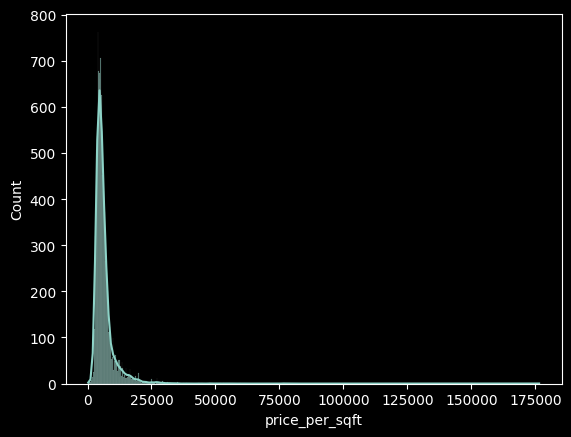

In [29]:
# big outliner
# >> should remove
sns.histplot(data=df3, x='price_per_sqft',kde=True)

In [30]:
# remove outliers of price_per_sqft by location
# only take those within -1 to 1 STD

# Groupby Object in pandas is not a df itself. It has groups and you can iterate to access each group
# each subgroup within a groupby object in pandas is itself a DataFrame

def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): #key = location_name in the groupby df
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df4 = remove_pps_outlier(df3)
print(df4.shape)
df4.head()

(10301, 8)


,location,size,total_sqft2,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


## price of bedrooms
logics: compare if price of 2 bedrooms is less than that of 3 bedrooms in the same location, which should be logically

In [31]:
df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
other                   2310
Whitefield               484
Sarjapur  Road           305
Electronic City          279
Kanakpura Road           196
                        ... 
Banjara Layout             4
HAL 2nd Stage              4
Vishwapriya Layout         4
Vishveshwarya Layout       4
Marsur                     3
Name: location, Length: 241, dtype: int64

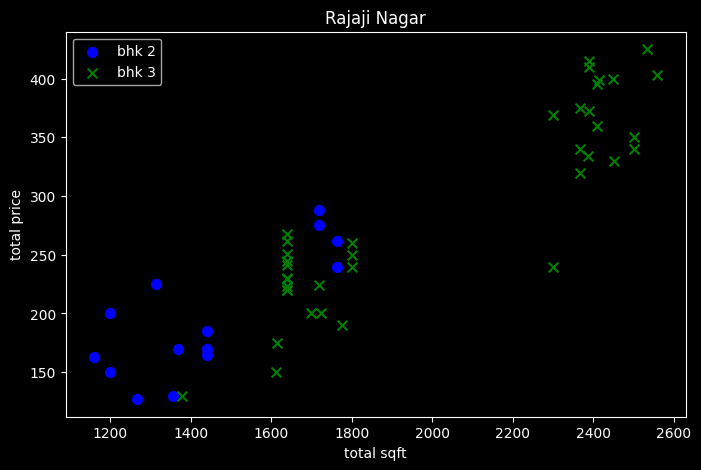

In [32]:
def plot_compare_price(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (8,5)
    plt.scatter(bhk2.total_sqft2, bhk2.price, color='blue', marker='o', label='bhk 2', s=50)
    plt.scatter(bhk3.total_sqft2, bhk3.price, color='green', marker='x', label='bhk 3', s=50)
    plt.xlabel('total sqft')
    plt.ylabel('total price')
    plt.legend()
    plt.title(location)
    plt.show()
plot_compare_price(df4, 'Rajaji Nagar')

# accordingly, same sqft but 2 bedrooms have higher prices

In [33]:
df4.head()

,location,size,total_sqft2,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


we should remove properties where for same location & same sqft, the price of higher bedroom property (3 bedrooms) is less than that of lower one (2 bedrooms)\
For each location, create a dictionary of price stats per bhk, ie.
{\
    '1':{\
        'mean': 4000,\
        'std': 2000,\
        'count': 34\
    },\
    '2':{\
        'mean': 4300,\
        'std': 2300,\
        'count': 22\
    }\
}\
>> remove those 2BHK properties with price_per_sqft less than that of 1BHK

In [34]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df[['location','price_per_sqft','bhk']].groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0],
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats_prev = bhk_stats.get(bhk-1) #mean of previous bhk_df
            if stats_prev and stats_prev['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats_prev['mean'])].index.values)
        # print(exclude_indices)
        # print(location, bhk_stats)
        # print(bhk_stats.get(bhk-1))
    return df.drop(exclude_indices, axis='index')

df5 = remove_bhk_outliers(df4)
df5.shape

(7350, 8)

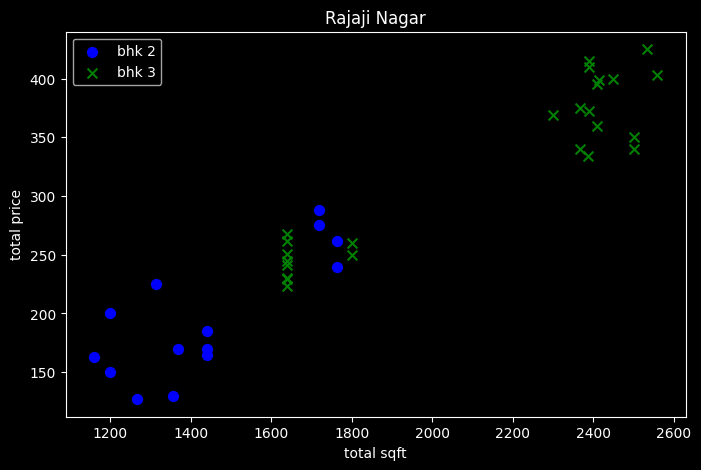

In [35]:
# replot to check
plot_compare_price(df5, 'Rajaji Nagar')

<Axes: xlabel='price_per_sqft', ylabel='Count'>

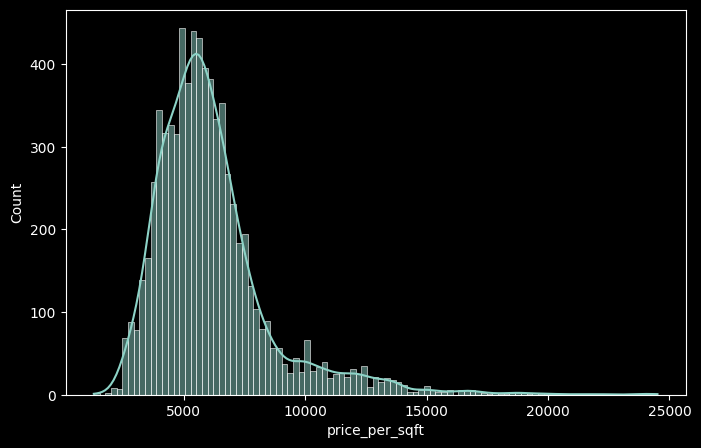

In [36]:
sns.histplot(df5, x='price_per_sqft', kde=True)


## Bathroom

Text(0, 0.5, 'count')

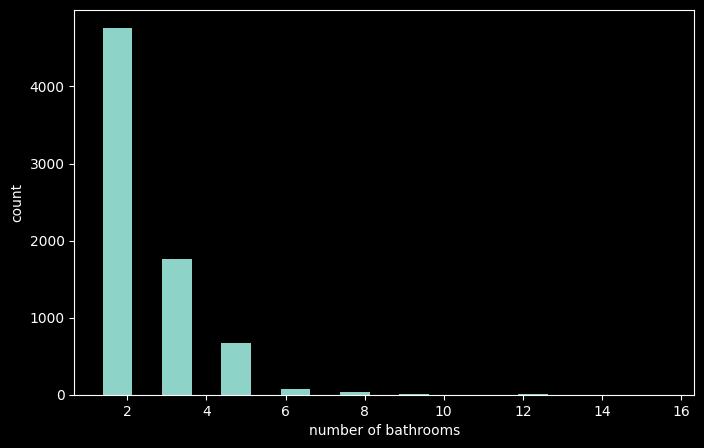

In [37]:
plt.hist(df5['bath'], rwidth=0.5)
plt.xlabel('number of bathrooms')
plt.ylabel('count')

In [38]:
# check if any properties having # bathrooms > # bedrooms + 2
# too many bath compared to bedrooms
# your real estate expert says it's unusal
df5[(df5.bath > (df5.bhk + 2))]

,location,size,total_sqft2,bath,balcony,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5274,Nagasandra,4 Bedroom,7000.0,8.0,NaN,450.0,4,6428.571429
6759,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8464,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [39]:
df6 = df5[(df5.bath < (df5.bhk + 2))]
df6 = df6.drop(['balcony','size','price_per_sqft'], axis='columns')
df6.shape

(7234, 5)

# MODEL BUILDING

## Get_dummies

In [40]:
df7 = []
df7 = df6
location_dummies = pd.get_dummies(df7.location, dtype=int, prefix='', prefix_sep='')

In [41]:
df7 = pd.concat([df7,location_dummies], axis='columns')
df7 = df7.drop(['other','location'], axis='columns')
df7

,total_sqft2,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10293,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10296,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10297,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# drop 'other' column
# df7 = pd.get_dummies(df7, dtype=int).drop('location_other', axis ='columns')


In [43]:
df7.head()


,total_sqft2,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [44]:
X = df7.drop('price', axis='columns')
y = df7.price
print(X.shape)

(7234, 243)


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8622067282151873

In [47]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=10)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82461464, 0.80500328, 0.89436263, 0.87852321, 0.8903216 ])

## GridSearch

In [48]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [49]:
def find_best_model_with_gridsearch(X,y):
    model_params = {
        'lr': {
            'model': LinearRegression(),
            'params': {
                'positive':[False]
                }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random', 'cyclic']
            }
        },
        'tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for model, config in model_params.items():
        print(model, config)
        gs = GridSearchCV(config['model'], config['params'], cv=cv,return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model,
            'best_score': "{:.7f}".format(gs.best_score_) ,
            'best_params': gs.best_params_,
        })
    return pd.DataFrame(scores, columns = ['model','best_score','best_params'])

In [50]:
find_best_model_with_gridsearch(X, y)

lr {'model': LinearRegression(), 'params': {'positive': [False]}}
lasso {'model': Lasso(), 'params': {'alpha': [1, 2], 'selection': ['random', 'cyclic']}}
tree {'model': DecisionTreeRegressor(), 'params': {'criterion': ['mse', 'friedman_mse'], 'splitter': ['best', 'random']}}


KeyboardInterrupt: 

## Predict

In [ ]:
df7.columns

Index(['total_sqft2', 'bath', 'price', 'bhk', 'location_1st Block Jayanagar',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout',
       'location_5th Phase JP Nagar',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=244)

In [ ]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr.predict([x])[0]

In [ ]:
predict_price('location_1st Phase JP Nagar', 1000,2,2)

c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(87.62885976415771)

In [ ]:
predict_price('location_1st Phase JP Nagar', 1000,2,3)

c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(85.84283083843337)

In [ ]:
predict_price('location_Indira Nagar', 1000,2,2)

c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(188.61976796325845)

In [ ]:
predict_price('location_Indira Nagar', 1000,3,3)

c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(190.51660113655154)

# Export model

In [251]:
import pickle
with open(path + 'banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr,f)

In [252]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open(path + 'columns.json', 'w') as f:
    f.write(json.dumps(columns))